# World Data League 2022

## 🎯 Challenge
Avencas Marine Protected Area: Predict the future of the local ecosystem and its species


<img src="wdl_2023.png" alt="MoMoneyMoModels_Badge_whitebackground.png" style="width:35%">

## Team: Mo Money, Mo Models
## 👥 Authors
* David Raposo
* Duarte Pereira
* Martim Chaves
* Paulo Sousa


## 💻 Development
Start coding here! 🐱‍🏍

Create the necessary subsections (e.g. EDA, different experiments, etc..) and markdown cells to include descriptions of your work where you see fit. Comment your code. 

All new subsections must start with three hash characters. More specifically, don't forget to explore the following:
1. Assess the data quality
2. Make sure you have a good EDA where you enlist all the insights
3. Explain the process for feature engineering and cleaning
4. Discuss the model / technique(s) selection
5. Don't forget to explore model interpretability and fairness or justify why it is not needed

Pro-tip 1: Don't forget to make the jury's life easier. Remove any unnecessary prints before submitting the work. Hide any long output cells (from training a model for example). For each subsection, have a quick introduction (justifying what you are about to do) and conclusion (results you got from what you did). 

Pro-tip 2: Have many similiar graphs which all tell the same story? Add them to the appendix and show only a couple of examples, with the mention that all the others are in the appendix.

Pro-tip 3: Don't forget to have a motivate all of your choices, these can be: Data-driven, constraints-driven, literature-driven or a combination of any. For example, why did you choose to test certain algorithms or why only one.

### Introduction

#### The place

Avencas, near Lisbon, Portugal, was classified as a Biophysical Interest Zone (ZIBA) in 1998 due to its **high intertidal biodiversity**.

This classification **sparked controversy and conflict with locals**, leading to **non-compliance** with regulations. In 2016, after concerted efforts from local authorities, Avencas was reclassified as a Marine Protected Area (MPA). Marine Protected Areas (MPAs) constitute coastal management tools that aim to mitigate threats to the functioning of the areas and can be planned according to diﬀerent speciﬁc objectives.

Along with the reclassification, **public participation sessions and environmental awareness** activities were carried out, **improving regulation compliance**, particularly within the **fishing community**.

Certain activities, including aquaculture, water motor sports, fishing, and collection of animals, are prohibited unless authorized for scientific studies. (From Ferreira et al. 2017)

#### A Success Story

"[...] user management actions have been created including visitors’ pathways through the rocky platforms and information spots displaying signs with area specific rules at the entrance to the beach. Positive results point to the success of this approach, as visitors either agreed or respected the various management actions implemented. A survey showed that 84% of visitors look favorable upon the information spots and 76% agree with the location of the access pathways. " (Challenge Brief)

#### A Problem Arises...

But... "The local usages are now under control, [...] allowing for a decrease in the anthropogenic stress of this small MPA, so in theory the intertidal ecosystem should be recovering at a faster rate than what is being recorded by our teams of biologists." In other words: locals are now not adding stress to the MPA. But, it's still not recovering as fast as we expected. So, some other factors are probably at play here, likely related to the global changes to the climate that we are witnessing.

#### The Solution

Knowing this, a great tool to further improve the biodiversity, and assure the health and sustainability of the Avencas MPA, would be an **interactive app** that could visually represent the sessile species coverage in the MPA, and informs the locals and the general populace of how important sessile species are for the Avencas MPA, and for marine life overall.

This could be in the form of an **interactive, sea-side screen**, and an **online web app**.

The **goal** of this app would be to, **beyond the specific Avencas MPA**, captivate people, locals and non-locals, to how important marine life can be, and to incentivize them to become **champions of environmentally friendly causes**, so that they may pressure policy makers, and contribute towards meaningful, large scale, change.

Sessile species highly contribute towards MPAs, in several ways. Here's some that could be emphasized:

* Biodiversity: Our ocean is amazing - it's a home for all sorts of sessile organims like algae, coral, and even sea slugs! All of these different being create complex neighboorhoods that host a wild variety of life. Some call corals "rainforests of the sea", as they're teeming with fascinating biodiversity!

* Food Source: Each being plays a part in these complex neighboorhouds down under the sea. Some are treats for other larger beings, like algae, mussels, and barnacles, while other act as an amazing clean-up crew, like the amazing fungi. Each being is important, as each is a key element to the assurance of the marina areas, keeping the ocean clean and healthy!

* Carbon Sequestration: Also, another major role that algae and coral play is when it come to sucking up carbon dioxide and giving oxygen in return, aiding us in fighting climate change. Besides being pretty, they're also working hard to keep our planet cooool.

("Marine Biology: An Ecological Approach" by Nybakken and Bertness, "Dynamics of Marine Ecosystems: Biological-Physical Interactions in the Oceans" by Mann and Lazier)

But first... let's look at the data that we have at hand!

### EDA

Examining the structure, contents, and basic statistics of the dataset. 

#### Imports and Setup

In [12]:
# Relevant Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import numpy as np

In [2]:
# set Seaborn style and context
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context('notebook')

#### Initial Feel

In [4]:
data_path = os.path.join("data", "raw", "files_WDL", "cascais_data", "AMPA_Data_Sample.xlsx")

with pd.ExcelFile(data_path) as xls:
    sheet_names = xls.sheet_names          

print(sheet_names) 

['Sessil (% Coverage)', ' Mobil (nº individuals)', 'Invasive_conservat species list']


Our main dataset has 3 sheets.

Opening each sheet, visually, we can understand that:
1. 'Sessil (% Coverage)' focuses on sessile species, i.e. species that fixate on a substracte. It contains measures of percentage of coverage for each specie being analysed for a random "quadrat" in one of five sectors of the MPA. These measures seem to be taken sporadically, around a couple of times per month, over the span of many years, from 2011 to 2020.
2. ' Mobil (nº individuals)' is similar to the previous sheet, but contains only mobile species.
3. 'Invasive_conservat species list' dictates which species are invasive, and which are under risk of extinction.

#### Reading the Data

In [68]:
sessil_df = pd.read_excel(data_path, sheet_name=sheet_names[0])
mobil_df = pd.read_excel(data_path, sheet_name=sheet_names[1])
invsve_df = pd.read_excel(data_path, sheet_name=sheet_names[2])

##### Removing extra unecessary columns

Visually, it has been understood that there are some columns that are not relevant to us, and that can be dropped.
They are information about who took the sample, and two extra columns that contain no information. So, let's get rid of them! :)

In [69]:
columns_to_drop_sessil = ['Sampler', 'Coluna1', 'Coluna2']
columns_to_drop_mobile = ['Sampler', 'Column1', 'Column2', 'Column3']

sessil_df = sessil_df.drop(columns_to_drop_sessil, axis=1)
mobil_df = mobil_df.drop(columns_to_drop_mobile, axis=1)

#### Join Sessil and Mobil Data

The goal of this section is to join the Sessil and Mobil dataframes.

The key components to do this are Date, Hour, Zone, and, within the zone, Supra/Middle (closer or further away from the coast).

These components should allow us to join these dataframes in a way that makes sense, i.e., for the same date and hour, and the same general area, we'll have an idea of which species are abound. :)

Ideally, all of the other columns that have meta information such as Tide, and Weather Condition would be included, but, as we'll find out in a second, that's not ideal...

So, to start off, we have to get an idea of missing values for these particular columns.

##### Analysing Missing Values of Relevant Columns

In [70]:
rel_column_names = ['Date', 'Hour', 'Zone', 'Supratidal/Middle Intertidal']

for col in rel_column_names:
    missing_vals_sessil = sessil_df[col].isnull().sum()
    missing_vals_mobile = mobil_df[col].isnull().sum()

    print(f"Missing values for column {col} for sessil_df: {missing_vals_sessil}")
    print(f"Missing values for column {col} for mobile_df: {missing_vals_mobile}")

Missing values for column Date for sessil_df: 1
Missing values for column Date for mobile_df: 93
Missing values for column Hour for sessil_df: 1
Missing values for column Hour for mobile_df: 93
Missing values for column Zone for sessil_df: 1
Missing values for column Zone for mobile_df: 93
Missing values for column Supratidal/Middle Intertidal for sessil_df: 1
Missing values for column Supratidal/Middle Intertidal for mobile_df: 93


Interesting, let's check if whenever there's a missing value for one of our relevant columns, if that's also the case for the other relevant columns... We want a heatmap that shows pairwise overlaps in missingness. Essentially, for any two given columns, we want to know what percent of the rows are missing in both.

In [51]:
def plot_missing_overlap(df, rel_column_names):
    # Initialize a dataframe of zeros with the same column and index as rel_column_names
    overlaps = pd.DataFrame(0, index=rel_column_names, columns=rel_column_names, dtype=float)
        
    # For each pair of columns, calculate the overlap in missingness and store it in 'overlaps'
    for col1 in rel_column_names:
        for col2 in rel_column_names:
            # Calculate overlap between two columns
            overlap = df[col1].isnull() & df[col2].isnull()
            overlaps.loc[col1, col2] = overlap.sum() / df[col2].isnull().sum()
    
    # Create a mask to only show the lower triangle
    mask = np.triu(np.ones_like(overlaps, dtype=bool))
    
    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(overlaps, mask=mask, annot=True, fmt=".2%", cmap='Blues', cbar=True, square=True)
    plt.title('Overlap of Missing Values')
    plt.show()

sessil_df


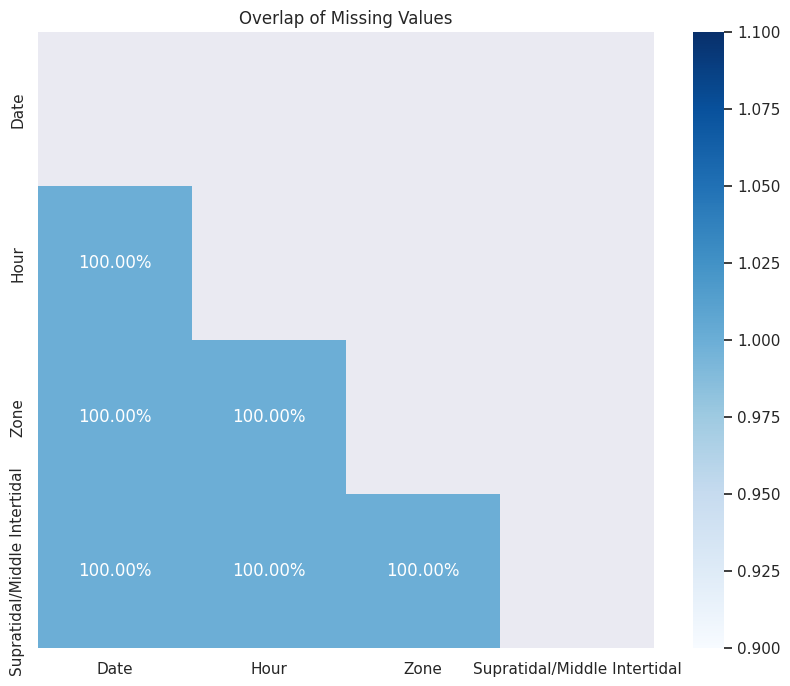

In [71]:
# Plot for both dataframes
print("sessil_df")
plot_missing_overlap(sessil_df, rel_column_names)

mobil_df


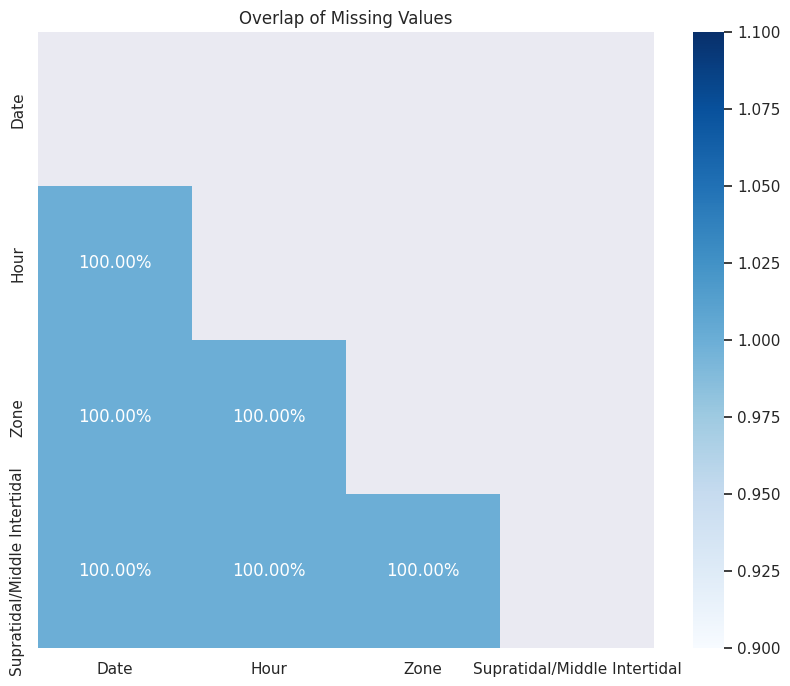

In [72]:
print("mobil_df")
plot_missing_overlap(mobil_df, rel_column_names)

We can conclude that when there's a missing Date, there's a missing Hour, and so on... Let's drop the rows where there are missing values from our relevant columns. (We also checked that we were't losing a lot of interesting info by doing this, charts for that in the Visualizations tab)

In [73]:
# Drop NAs
sessil_df = sessil_df.dropna(subset=rel_column_names)
mobil_df = mobil_df.dropna(subset=rel_column_names)

##### Formating 'Date' and 'Hour'

We'll also add a 'DateTime' column for sorting the rows later...

###### Formating Sessil DF code

In [56]:
def fix_sessil_time_format(time_str):
    """
    This has to be done because the time was probably inputed by hand,
    so it varies a bit. This is to take into account those variations.
    """
    try:
        # Attempt to convert the time string into the usual format
        time_obj = pd.to_datetime(time_str, format="%H:%M:%S").time()
    except ValueError:
        try:
            # If a ValueError is raised, try to convert from "%H:%M" format
            time_obj = pd.to_datetime(time_str, format="%H:%M").time()
        except ValueError:
            # If a ValueError is still raised, try to convert from "%H.%M" format
            time_obj = pd.to_datetime(time_str, format="%H.%M").time()
    # Return the time object in string format with "%H:%M:%S"
    return time_obj.strftime("%H:%M:%S")

In [55]:
def format_date_hour_sessil(sessil_meta_df):
    # Stringify Date and Hour
    sessil_meta_df['Date'] = sessil_meta_df['Date'].astype(str)
    sessil_meta_df['Hour'] = sessil_meta_df['Hour'].astype(str)

    # Change formats
    sessil_meta_df['Date'] = pd.to_datetime(sessil_meta_df['Date'], format="%Y-%m-%d")
    sessil_meta_df['Hour'] = sessil_meta_df['Hour'].apply(fix_sessil_time_format)

    # Add DateTime Column
    sessil_meta_df['DateTime'] = pd.to_datetime(\
        sessil_meta_df['Date'].astype(str) + ' ' + sessil_meta_df['Hour'].astype(str))
    
    return sessil_meta_df

###### .

In [74]:
sessil_df = format_date_hour_sessil(sessil_df)

###### Formating Mobil DF code

In [60]:
def fix_mobil_date_format_row(date_str, prev_date):
    try:
        # Attempt to convert the date string into the usual format
        pd.to_datetime(date_str, format="%Y-%m-%d", errors='raise')
        return date_str
    except ValueError:
        try:
            # If a ValueError is raised, try to convert from "%d-%m-%Y" format to "%Y-%m-%d" format
            return pd.to_datetime(date_str, format="%d-%m-%Y").strftime("%Y-%m-%d")
        except ValueError:
            # If another ValueError is raised, return the previous date
            return prev_date

def fix_mobil_date_format(mobile_meta_df):
    prev_date = None
    for i in range(len(mobile_meta_df)):
        current_date = fix_mobil_date_format_row(mobile_meta_df.loc[i, 'Date'], prev_date)
        mobile_meta_df.loc[i, 'Date'] = current_date
        prev_date = current_date

    # Then, convert the 'Date' column into datetime format
    mobile_meta_df['Date'] = pd.to_datetime(mobile_meta_df['Date'], format="%Y-%m-%d")

    return mobile_meta_df

In [61]:
def fix_time_format_mobil(time_str):
    try:
        # First check if time_str is a decimal (like '0.5104166666666666')
        # If it is, convert to time directly
        time_fraction = float(time_str)
        time_obj = pd.to_datetime((time_fraction * 24 * 60 * 60), unit='s').time()
    except ValueError:
        try:
            # Attempt to convert the time string into the usual format
            time_obj = pd.to_datetime(time_str, format="%H:%M:%S").time()
        except ValueError:
            try:
                # If a ValueError is raised, try to convert from "%H:%M" format
                time_obj = pd.to_datetime(time_str, format="%H:%M").time()
            except ValueError:
                # If a ValueError is still raised, try to convert from "%H.%M" format
                time_obj = pd.to_datetime(time_str, format="%H.%M").time()
    # Return the time object in string format with "%H:%M:%S"
    return time_obj.strftime("%H:%M:%S")

In [63]:
def format_date_hour_mobil(mobile_meta_df):
    # Stringify Date and Hour
    mobile_meta_df['Date'] = mobile_meta_df['Date'].astype(str)
    mobile_meta_df['Hour'] = mobile_meta_df['Hour'].astype(str)

    # Fix Date and Hour format
    mobile_meta_df = fix_mobil_date_format(mobile_meta_df)
    mobile_meta_df['Hour'] = mobile_meta_df['Hour'].apply(fix_time_format_mobil)

    # Add DateTime column
    mobile_meta_df['DateTime'] = pd.to_datetime(\
        mobile_meta_df['Date'].astype(str) + ' ' + mobile_meta_df['Hour'].astype(str))
    
    return mobile_meta_df

###### .

In [75]:
mobil_df = format_date_hour_mobil(mobil_df)

##### Merging Sessil and Mobil

We'll be doing a left join of the Sessil df with the Mobil df. We're sort of giving priority to the Sessil data as it was the one with, so far, highest data quality (in terms of missing and invalid data).

In [77]:
def study_merging(sessil_df, mobil_df, columns_to_compare):
    merged_df = pd.merge(sessil_df[columns_to_compare],
                         mobil_df[columns_to_compare],
                         on=columns_to_compare, 
                         how='left', indicator=True)
    
    missing_rows = merged_df[merged_df['_merge'] == 'left_only']

    return len(merged_df), len(missing_rows)

In [78]:
['DateTime', 'Tide', 'Weather Condition',
'Water temperature (ºC)', 'Zone',
'Supratidal/Middle Intertidal', 'Substrate']

['DateTime',
 'Tide',
 'Weather Condition',
 'Water temperature (ºC)',
 'Zone',
 'Supratidal/Middle Intertidal',
 'Substrate']

In [79]:
columns_to_compare = ['DateTime', 'Zone', 'Supratidal/Middle Intertidal']

merge_len, missing_len = study_merging(sessil_df, mobil_df, columns_to_compare)
print(f"Merged length: {merge_len}; Missing rows length: {missing_len}")

Merged length: 3516; Missing rows length: 52


Merged length represents the number of rows obtained after the merge. Note that this can be larger than the length of sessil df when there are "duplicates" in mobil df ("duplicates" with quotes because we're talking about duplicates of the specific columns that we're using, other columns may not necessarily be duplicates). Ideally, we want to keep this number as close as possible to the length of sessil df, which is 2010. This means that we're merging on unique combinations of values.

Then, missing rows are rows in the mobil df that are left behind, since we're doing a left join. Ideally, we want to keep this number as low as possible, to not lose any information from mobil df.

We tried several configurations on how to do this join. Unfortunately, there was no perfect way.

So, we opted for doing a join on the ['DateTime', 'Zone', 'Supratidal/Middle Intertidal'] columns.
This way, we're guaranteeing that, for each row, the data present there sort of belongs to the same key comnponents, which is day of the year, hour of the day, and location (combination of Zone and Tidal location).

Before doing the join, we'll drop the mobil df "duplicates" to have one sample per each Date, Hour, Zone, Tide location (keeping the first one). Also, we're only interested in the values of the species, so we'll drop all of the other columns as well, containing meta information. Since they are mobile species, we considered that it was more important to keep the information about substrate and so on of the sessil df.

###### List of different groups of Columns 

In [82]:
mobil_meta_columns = ['Date', 'Hour', 'Tide', 'Weather Condition',
                      'Water temperature (ºC)', 'Zone',
                      'Supratidal/Middle Intertidal',
                      'Substrate', 'DateTime']

In [83]:
mobil_species_columns = [col for col in mobil_df.columns if col not in mobil_meta_columns]

In [86]:
sessil_meta_columns = ['Date', 'Hour', 'Tide', 'Weather Condition',
                       'Water temperature (ºC)', 'Zone',
                       'Supratidal/Middle Intertidal', 'Substrate',
                       'observações', 'DateTime']

In [87]:
sessil_species_columns = [col for col in sessil_df.columns if col not in sessil_meta_columns]

###### List of Mobil df columns to drop

In [95]:
# All meta info except ['DateTime', 'Zone', 'Supratidal/Middle Intertidal'] (columns_to_compare)
mobil_columns_2drop = ['Date', 'Hour', 'Tide', 'Weather Condition',
                      'Water temperature (ºC)', 'Substrate']

# drop the unwanted columns from mobil_df
mobil_df_reduced = mobil_df.drop(columns=mobil_columns_2drop)

# Drop duplicates based on columns_to_compare in mobil_df, keeping the first occurrence
mobil_df_reduced = mobil_df_reduced.drop_duplicates(subset=columns_to_compare, keep='first')

###### Left join data!

In [97]:
# merge the dataframes
df = pd.merge(sessil_df, mobil_df_reduced,
              on=columns_to_compare, how='left')

In [98]:
df

,Date,Hour,Tide,Weather Condition,Water temperature (ºC),Zone,Supratidal/Middle Intertidal,Substrate,Chthamalus sp.,Balanus perforatus,...,Nudibranquio N.I.,Callionymus lira (peixe-pau lira),Oncidiella celtica,Doriopsilla areolata (nudibrânquio),Scorpaena sp. (Rascasso),Lipophrys pholis (ad.),Diplodus cervinus,Gobiusculus flavescens,TOTAL,Abundance (ind/m2)
0,2011-11-28,12:20:00,0.6,Clear sky,16,D,Supra,Rock,7,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.05
1,2011-11-28,12:35:00,0.6,Clear sky,16,D,Supra,Rock,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,2011-11-28,10:10:00,0.6,Clear sky,16,D,Medium,Puddle,0,,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.20
3,2011-11-28,10:25:00,0.6,Clear sky,16,D,Medium,Rock,8,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.10
4,2011-11-28,10:40:00,0.6,Clear sky,16,D,Medium,Rock,25,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,2020-11-16,08:00:00,0.4,Sunny,18,F,Medium,Rock/Sand,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.25
2006,2020-11-16,08:00:00,0.4,Sunny,18,F,Medium,Rock/Sand,17,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.25
2007,2020-11-16,08:00:00,0.4,Sunny,18,F,Medium,Rock,10,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.25
2008,2020-11-16,08:00:00,0.4,Sunny,18,F,Supra,Rock,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00


Hurray!! Now we have both the Sessil and Mobil data combined!

#### Analysis of Data Types

Let's analyse the meta information, such as the Date and Hour of sample collection, the substrate, and so on!

In [99]:
def initial_data_profiling(data: pd.DataFrame):
    # Get the data types of each column
    data_types = data.dtypes

    # Get the summary statistics of the DataFrame
    summary_stats = data.describe()

    # Get the number of missing values in each column
    missing_values = data.isnull().sum()

    # Get the unique values in each column
    unique_values = data.nunique()

    # Display the data profiling information
    print("Data Types:")
    print(data_types)
    print("\nSummary Statistics:")
    print(summary_stats)
    print("\nMissing Values:")
    print(missing_values)
    print("\nUnique Values:")
    print(unique_values)

In [100]:
print("Analysis of samples' meta info")
initial_data_profiling(df[sessil_meta_columns])

Analysis of samples' meta info
Data Types:
Date                            datetime64[ns]
Hour                                    object
Tide                                   float64
Weather Condition                       object
Water temperature (ºC)                  object
Zone                                    object
Supratidal/Middle Intertidal            object
Substrate                               object
observações                             object
DateTime                        datetime64[ns]
dtype: object

Summary Statistics:
              Tide
count  2010.000000
mean      0.729035
std       0.184047
min       0.300000
25%       0.600000
50%       0.700000
75%       0.900000
max       2.400000

Missing Values:
Date                               0
Hour                               0
Tide                               0
Weather Condition                  0
Water temperature (ºC)             8
Zone                               0
Supratidal/Middle Intertidal       0
Subst

In [106]:
df[sessil_species_columns].dtypes

Chthamalus sp.                               object
Balanus perforatus                           object
Patella sp.                                  object
Siphonaria algesirae                        float64
Gibbula sp.                                 float64
                                             ...   
Alga verde/azul - lavanda                   float64
Sphacelaria rigidula (pompons castanhos)    float64
Cystoseira sp.                               object
Laminaria sp.                               float64
TOTAL2                                       object
Length: 93, dtype: object

In [105]:
df[mobil_species_columns].dtypes

Caboz N.I.                                             object
Palaemon serratus                                      object
Nasariidae (búzio)                                     object
Diogenes pugilator                                     object
Marthasterias glacialis                               float64
Asterina gibbosa                                      float64
Eulalia viridis (poliqueta)                           float64
Sabellaria alveolata                                  float64
Octopus vulgaris                                      float64
Sepia officinallis                                    float64
Alloteuthis subulata                                  float64
Loligo vulgaris                                       float64
Parablennius gattorugine                              float64
Diplodus sp.                                          float64
Diplodus sargus                                       float64
Maja sp.                                              float64
Eriphia 

Some things to note:
- Water temperature and species information should be a float
- The distribution for the values of the Tide seems OK. In the Q&A, a subject matter expert mentioned that the large majority of the times the tide value should be around 0.8, which is the case. There are some cases where the value is considerably higher than that (2.4 maximum value), but that value seems reasonable, a statistical outlier, but not necessarily an anomaly

Knowing this, let's change those types, and plot some charts to get a better, visual idea of how things are.

##### Changing data types

In [101]:
# Convert object to numeric when needed
df['Water temperature (ºC)'] = pd.to_numeric(\
    df['Water temperature (ºC)'], errors='coerce')

In [109]:
for specie in sessil_species_columns:
    df[specie] = pd.to_numeric(\
        df[specie], errors='coerce')

In [110]:
for specie in mobil_species_columns:
    df[specie] = pd.to_numeric(\
        df[specie], errors='coerce')

(The species lists also contains a couple of columns that are sums and abundance levels, those should be floats as well)

#### Distribution of the values

How often are samples taken? Let's plot the number of samples per month taken to get an idea!

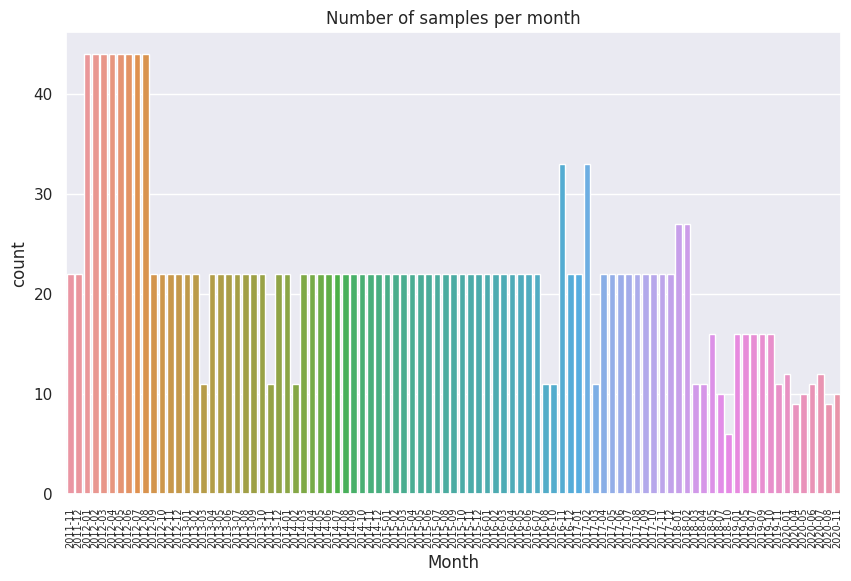

In [102]:
df['Month'] = df['Date'].dt.to_period('M') # Extracting month from Date

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Month')
plt.title('Number of samples per month')
plt.xticks(rotation=90, fontsize=7)
plt.show()

Except for the spikes aroud the year of 2012, it seems that the amount of samples being taken remains reasonably stable, so we shouldn't worry too much about the quality of the frequency of the data. Now, let's get an idea of the general distribution of the values.

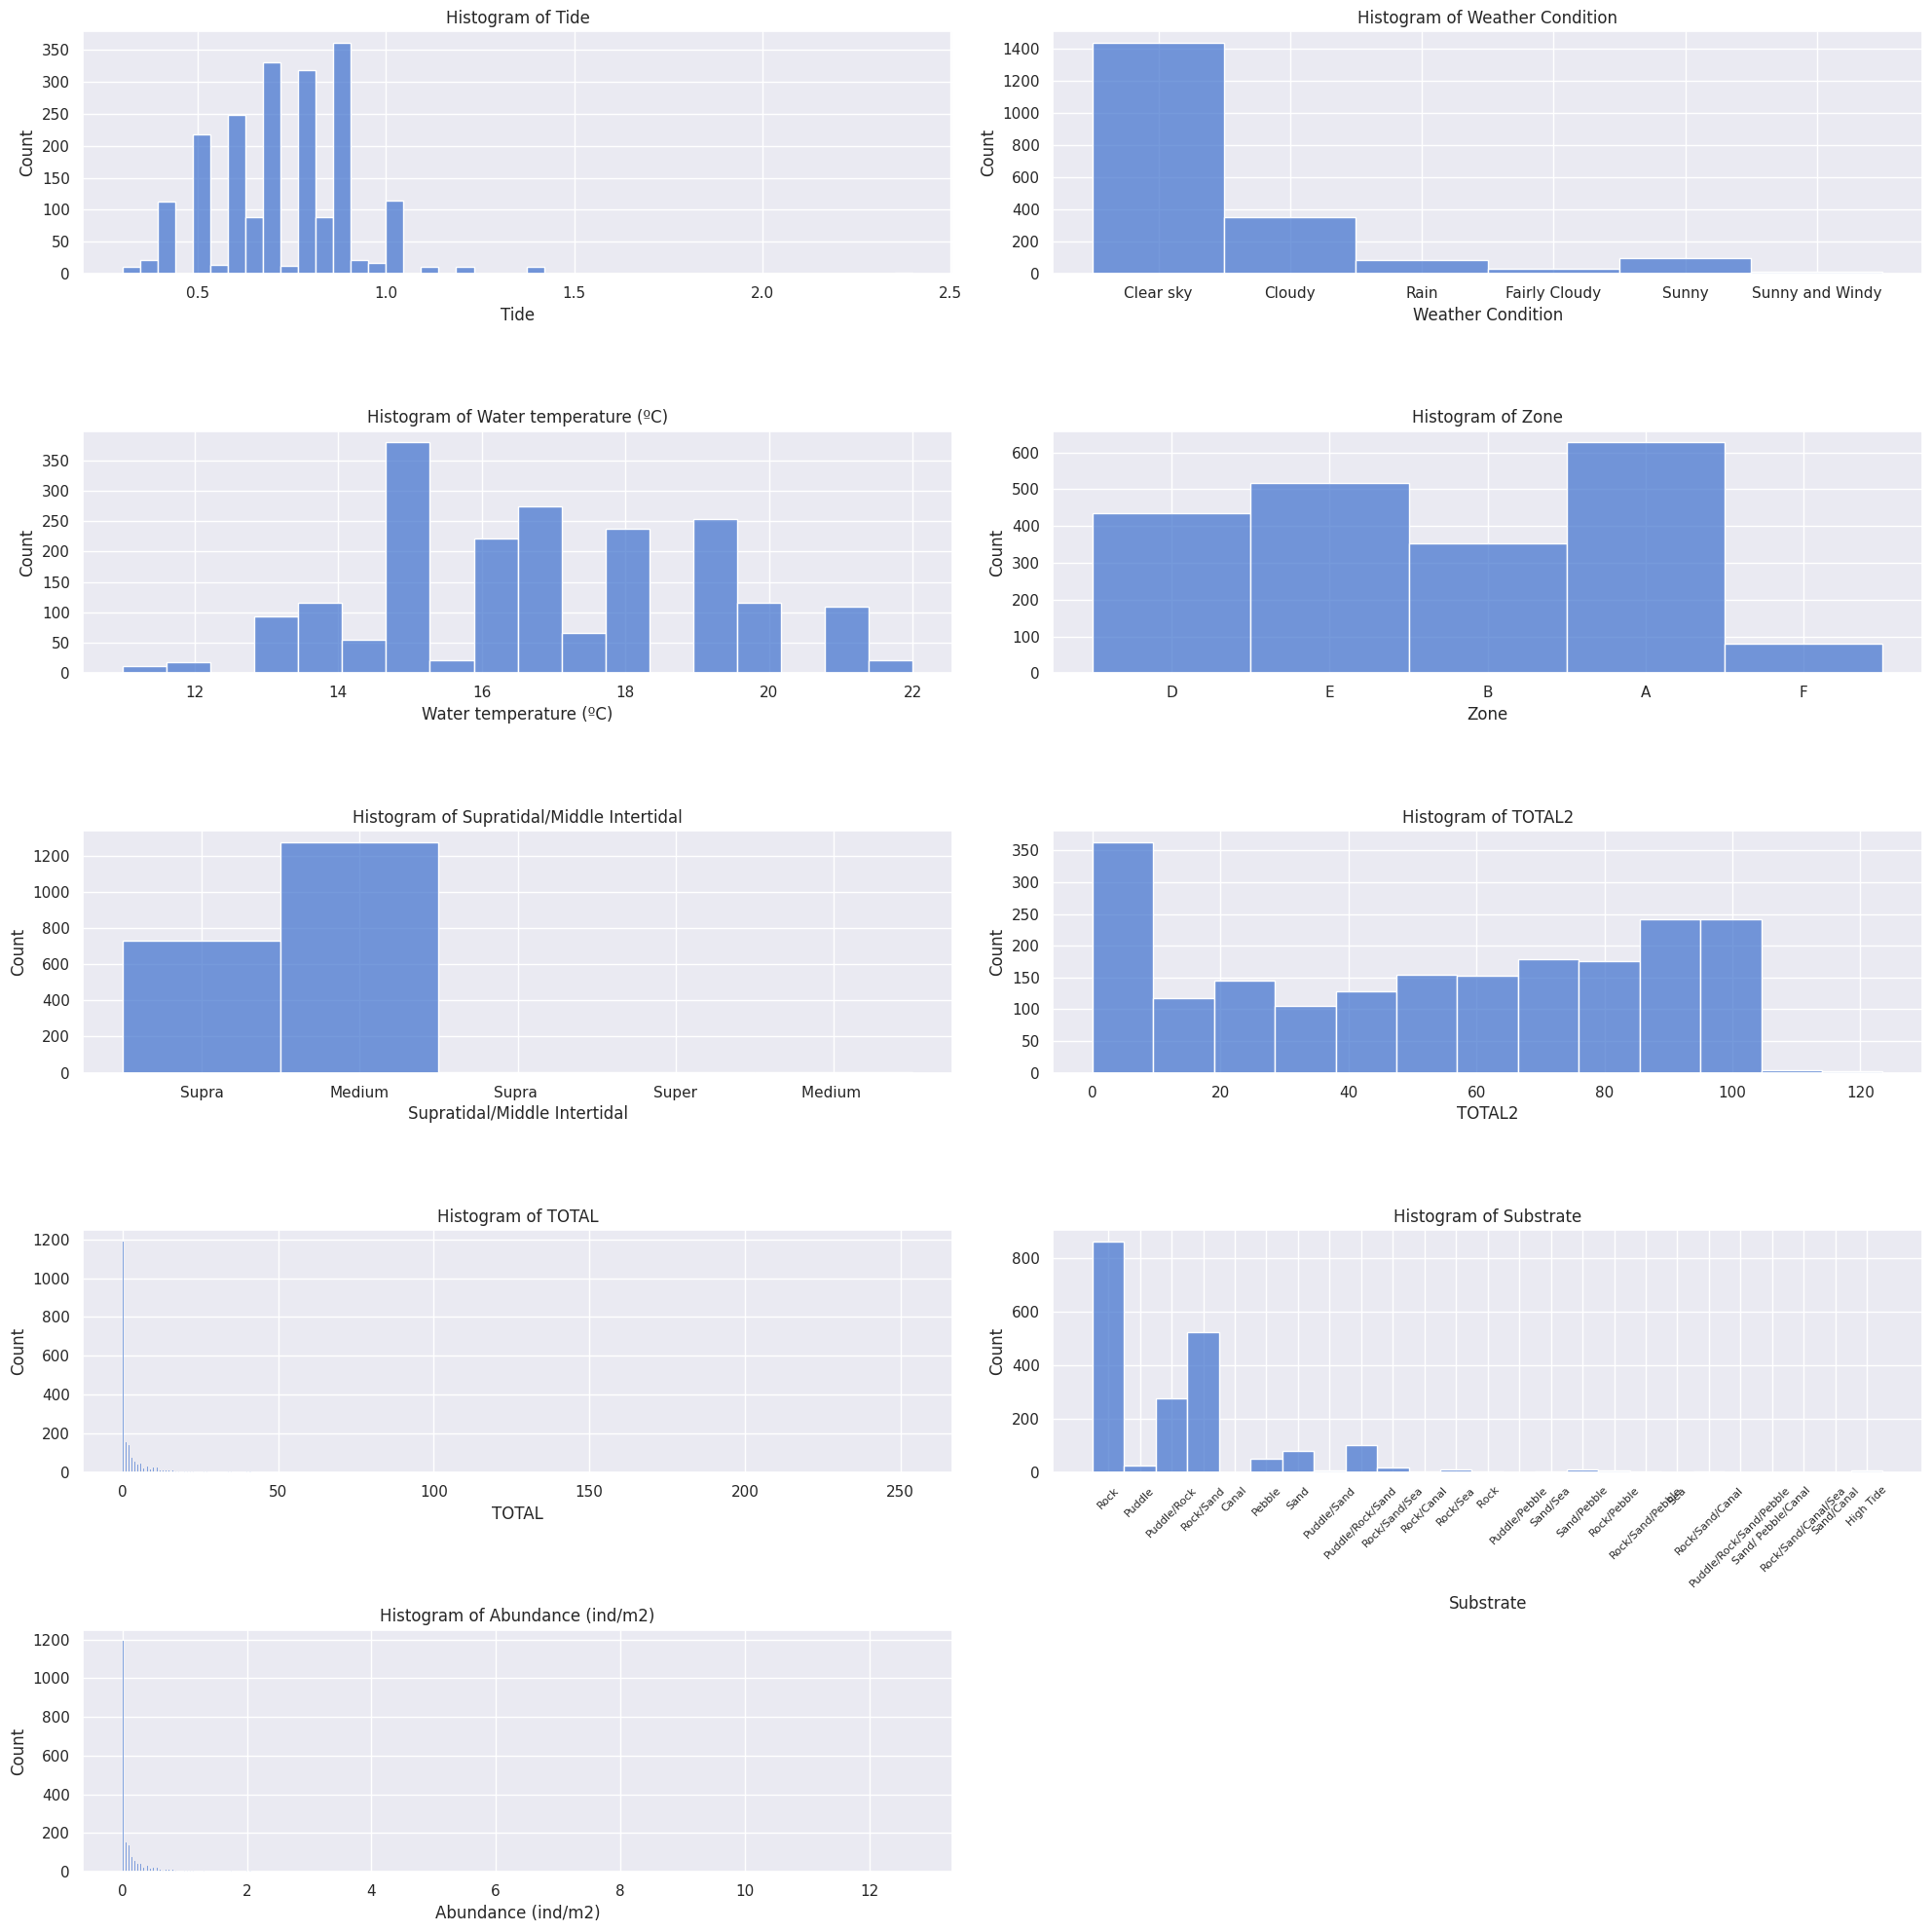

In [113]:
columns = ['Tide', 'Weather Condition', 'Water temperature (ºC)',
           'Zone', 'Supratidal/Middle Intertidal', 'TOTAL2',
           'TOTAL', 'Substrate', 'Abundance (ind/m2)']

fig = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(5, 2)

for i, column in enumerate(columns):
    ax = plt.subplot(gs[i])
    sns.histplot(data=df, x=column, ax=ax)
    ax.set_title('Histogram of ' + column)
    if column == 'Substrate':
        plt.xticks(rotation=45, fontsize=8)
    plt.tight_layout()

plt.show()

## 🖼️ Visualisations

### Removing rows with missing Date and Hour

Checking if removing rows without a Date and Hour meant losing a lot of information. In conclusion, when Date and Hour were missing, most of the other columns were missing too, the large majority of the times.

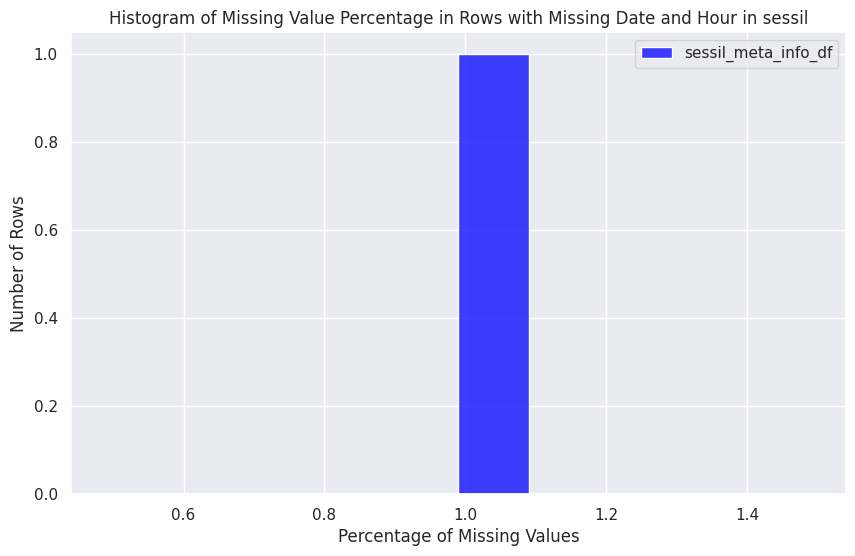

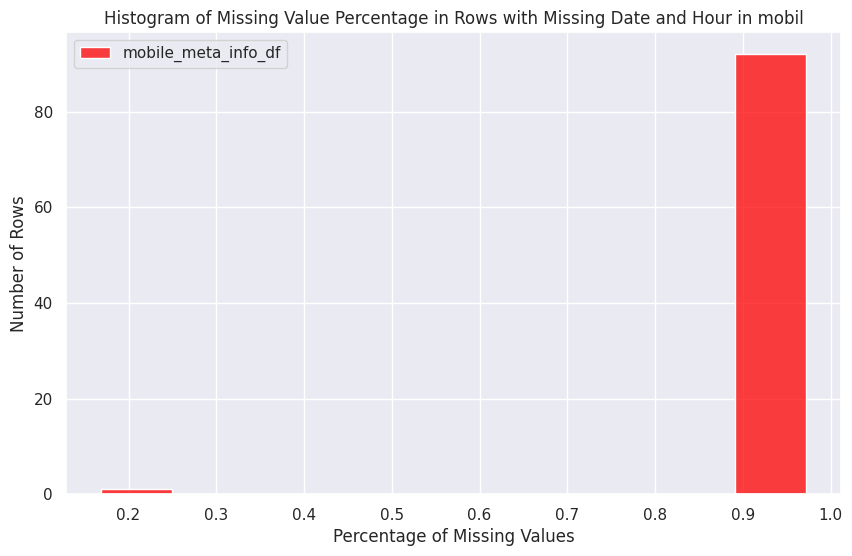

In [46]:
# Filter rows where both 'Date' and 'Hour' are missing
sessil_missing_date_hour = sessil_df[sessil_df[['Date', 'Hour']].isnull().all(axis=1)]
mobile_missing_date_hour = mobil_df[mobil_df[['Date', 'Hour']].isnull().all(axis=1)]

# Calculate the percentage of missing values in each row
sessil_missing_perc = sessil_missing_date_hour.isnull().mean(axis=1)
mobile_missing_perc = mobile_missing_date_hour.isnull().mean(axis=1)

# Create a new figure for sessil dataframe
plt.figure(figsize=(10,6))
sns.histplot(sessil_missing_perc, bins=10, label='sessil_meta_info_df', kde=False, color='blue')
plt.title('Histogram of Missing Value Percentage in Rows with Missing Date and Hour in sessil')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Number of Rows')
plt.legend()
plt.show()

# Create a new figure for mobile dataframe
plt.figure(figsize=(10,6))
sns.histplot(mobile_missing_perc, bins=10, label='mobile_meta_info_df', kde=False, color='red')
plt.title('Histogram of Missing Value Percentage in Rows with Missing Date and Hour in mobil')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Number of Rows')
plt.legend()
plt.show()

## 👓 References
List all of the external links (even if they are already linked above), such as external datasets, papers, blog posts, code repositories and any other materials.

## ⏭️ Appendix
Add here any code, images or text that you still find relevant, but that was too long to include in the main report. This section is optional.
